1. Write a python program which searches all the product under a particular product from www.amazon.in. The
product to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for
guitars.

In [384]:
# importing libraries
import selenium
import pandas as pd
from selenium import webdriver
import time
from bs4 import BeautifulSoup
# importing exceptions
from selenium.common.exceptions import StaleElementReferenceException,NoSuchElementException
# importing requests
import requests
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [388]:
driver = webdriver.Chrome()

In [389]:
page_url=driver.get("https://www.amazon.in/")

In [391]:
user_input=input("Enter product name:")

Enter product name: Guitar


In [392]:
search=driver.find_element(By.XPATH,'//input[@type="text"]')
search.send_keys(user_input)

In [393]:
search_button=driver.find_element(By.XPATH,'/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[3]/div/span/input')
search_button.click()

In the above question, now scrape the following details of each product listed in first 3 pages of your search
results and save it in a data frame and csv. In case if any product has less than 3 pages in search results then
scrape all the products available under that product name. Details to be scraped are: "Brand
Name", "Name of the Product", "Price", "Return/Exchange", "Expected Delivery", "Availability" and
“Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“.

In [394]:
product_name=[]

In [395]:
# scraping the product name
p_name=driver.find_elements(By.XPATH,'//span[@class="a-size-base-plus a-color-base a-text-normal"]')
for i in p_name:
    if i.text is None:
        product_name.append("-")

    else:
        product_name.append(i.text)

print(len(product_name),product_name)

60 ['Kadence Frontier guitar with Online Guitar learning course , Wine Red Acoustic Guitar with Die Cast Keys, Set of Strings, Strap, Picks and Bag (Wine Red, Acoustic)', 'MOCKING BIRD 38 Inch Acoustic Guitar for Beginners Musical Instruments For Adults premium kit wood curved cutaway design Guitar Accessories with string & 5 picks & bag for beige (Black Matte)', 'Henrix 38C 38 Inch Cutaway Acoustic Guitar With Dual Action Truss Rod, Gigbag, Picks, String Set, String Winder, Strap, Polishing Cloth & Ebook - Black', 'PS Signature 41inch RoseWood Acoustic Guitar, Free 1 set Strings, 3 Picks, Bag & Belt)', 'Juârez Acoustic Guitar Kit, 38 Inch Cutaway, 038C with Bag, Strings, Pick and Strap, Black', 'Intern INT-38C Right hand Acoustic Guitar Kit, With Bag, Strings, Pick And Strap, Black, small', 'Medellin 38” Acoustic Guitar with (free learning course) Matt finish with Picks(Blue)', 'Juârez Acoustic Guitar, 38 Inch Cutaway, 038C with Bag, Strings, Pick and Strap, Black (Acoustic Guitar Kit

In [396]:
start=0
end=3
urls=[]
for page in range(start,end+1):
    try:
        page_url=driver.find_elements(By.XPATH,'//a[@class="a-link-normal s-no-outline"]')
         # appending all urls
        for url in page_url:
            url=url.get_attribute('href')
            urls.append(url)

        print("Product urls of page {} has been scrapped.".format(page+1))

        next_button=driver.find_element(By.XPATH,'//a[@class="s-pagination-item s-pagination-next s-pagination-button s-pagination-separator"]')
        next_button.click()
        time.sleep(5)

    except StaleElementReferenceException as e:
        print("Stale Exception")
        next_page=next_button.get_attribute('href')
        driver.get(next_page)

Product urls of page 1 has been scrapped.
Product urls of page 2 has been scrapped.
Product urls of page 3 has been scrapped.
Product urls of page 4 has been scrapped.


In [397]:
product={}
product['Brand']=[]
product['Name']=[]
product['Price']=[]
product['Return/Exchange']=[]
product['Expected Delivery']=[]
product['Availability']=[]
product['Product URL']=[]

In [406]:
for url in urls[:4]:
    driver.get(url)
    print("Scraping url:",url)

    try:
        brand=driver.find_element(By.XPATH,'//div[@id="bylineInfo_feature_div"]')
        product['Brand'].append(brand.text)

    except NoSuchElementException:
        product['Brand'].append("-")

    try:
         name=driver.find_element(By.XPATH,'//html/body/div[2]/div/div[5]/div[3]/div[4]/div[1]/div/h1/span')
         product['Name'].append(name.text)

    except NoSuchElementException:
        product['Name'].append("-")

    try:
         price=driver.find_element(By.XPATH,'//span[@class="a-price-whole"]')
         product['Price'].append(price.text)

    except NoSuchElementException:
        product['Price'].append("-")

    try:
         return_exchange=driver.find_element(By.XPATH,'//div[@class="a-container return-policy-secondary-view-container"]/h2')
         product['Return/Exchange'].append(return_exchange.text)

    except NoSuchElementException:
        product['Return/Exchange'].append("-")

    
    try:
         expt_delivery=driver.find_element(By.XPATH,'/html/body/div[2]/div/div[5]/div[3]/div[1]/div[4]/div/div[1]/div/div/div/form/div/div/div/div/div[4]/div/div[3]/div[10]/div[1]/div/div/div/span')
         product['Expected Delivery'].append(expt_delivery.text)

    except NoSuchElementException:
        product['Expected Delivery'].append("-")

    try:
         availability=driver.find_element(By.XPATH,'//div[@id="availability"]')
         product['Availability'].append(availability.text)

    except NoSuchElementException:
        product['Availability'].append("-")

    product['Product URL'].append(url)
    time.sleep(2)




Scraping url: https://www.amazon.in/sspa/click?ie=UTF8&spc=MToxMTQyNzYxNDgyMDgyODMwOjE3MjY3MzEyMDg6c3BfYXRmOjIwMDk2NjA4NzUwNDk4OjowOjo&url=%2FKadence-Frontier-Acoustic-Guitar-Strings%2Fdp%2FB01GDZ46AA%2Fref%3Dsr_1_1_sspa%3Fcrid%3D3UUX36CHKF8QY%26dib%3DeyJ2IjoiMSJ9.H_dE0w8OHcmESxseNpLSv9VHAFZGAvnjiXP1ErC8wMYq4Yq1FtCZ4KfmApU3D3JSTsIX1FqZ6nUadmqtLYRopmq3tHDH8SQxwhma9L5bKFbz94QMIh-8EzQ5olKz5Lk-JCgVTvRArgMNCtBiF7SWgedfnSi21e0xTJAwAx8BBEAQ_ePyCXklF6bC-frug8sDmRXh4cRmxd1yoS4hHyVuRDFSvjxnEI8uDcB56zNsi6ZiYvdiifrV_HdZu5tdQpneN0QMdgIUoUQ58fN7lAQ6AaFPuyV61VEOu2vrypA9cqQ.r2jQDE2coukFdecpS9neUgi2ywTPQEZS9fJGCao3xjQ%26dib_tag%3Dse%26keywords%3DGuitar%26qid%3D1726731208%26sprefix%3Dguitar%252Caps%252C209%26sr%3D8-1-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1
Scraping url: https://www.amazon.in/sspa/click?ie=UTF8&spc=MToxMTQyNzYxNDgyMDgyODMwOjE3MjY3MzEyMDg6c3BfYXRmOjMwMDExODczMTI4ODEzMjo6MDo6&url=%2FMOCKING-BIRD-Beginners-Instruments-Accessories%2Fdp%2FB0CNGKK89K%2Fref%3Dsr_1_2_sspa%3Fcrid%3D3UU

In [407]:
df=pd.DataFrame(product)
df

,Brand,Name,Price,Return/Exchange,Expected Delivery,Availability,Product URL
0,Visit the Kadence Store,Kadence Frontier guitar with Online Guitar lea...,"4,799",,"FREE delivery Saturday, 21 September. Details",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
1,Visit the MOCKING BIRD Store,MOCKING BIRD 38 Inch Acoustic Guitar for Begin...,"3,449",,"FREE delivery Monday, 23 September. Order with...",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
2,Visit the Henrix Store,Henrix 38C 38 Inch Cutaway Acoustic Guitar Wit...,"3,299",,"FREE delivery Monday, 23 September. Details",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
3,Brand: PS Signature,"PS Signature 41inch RoseWood Acoustic Guitar, ...","3,899",,"FREE delivery Monday, 23 September. Order with...",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
4,Visit the Kadence Store,Kadence Frontier guitar with Online Guitar lea...,"4,799",,"FREE delivery Saturday, 21 September. Details",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
5,Visit the MOCKING BIRD Store,MOCKING BIRD 38 Inch Acoustic Guitar for Begin...,"3,449",,"FREE delivery Monday, 23 September. Order with...",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
6,Visit the Henrix Store,Henrix 38C 38 Inch Cutaway Acoustic Guitar Wit...,"3,299",,"FREE delivery Sunday, 22 September. Order with...",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
7,Brand: PS Signature,"PS Signature 41inch RoseWood Acoustic Guitar, ...","3,899",,"FREE delivery Tuesday, 24 September for Prime ...",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
8,Visit the Kadence Store,Kadence Frontier guitar with Online Guitar lea...,"4,799",-,"FREE delivery Saturday, 21 September. Details",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
9,Visit the MOCKING BIRD Store,MOCKING BIRD 38 Inch Acoustic Guitar for Begin...,"3,449",-,"FREE delivery Monday, 23 September. Order with...",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...


 3.Write a python program to access the search bar and search button on images.google.com and scrape 10
   images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’.

In [44]:
from selenium.webdriver.common.keys import Keys

In [127]:
driver=webdriver.Chrome()
driver.get("https:images.google.com/")

In [128]:
search=driver.find_element(By.XPATH,'//textarea[@class="gLFyf"]') 
search.send_keys("fruits")
search.send_keys(Keys.RETURN)

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
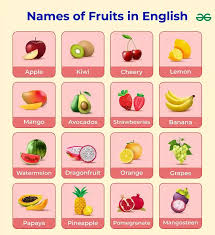
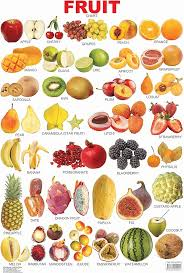
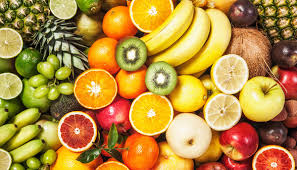
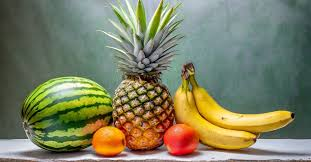
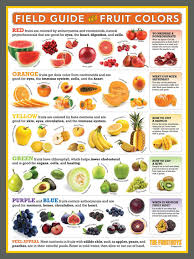
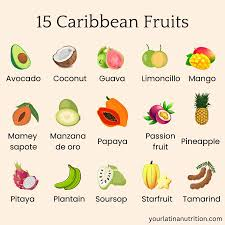
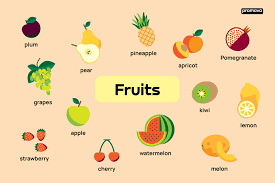
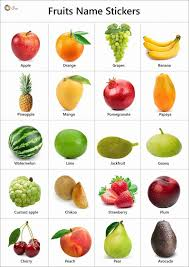
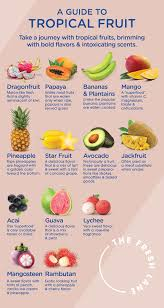
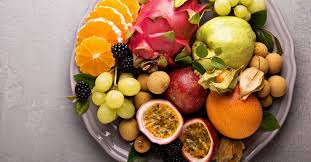

In [130]:
image=[]
img=driver.find_elements(By.XPATH,'//img[@class="YQ4gaf"]')
for i in img:
    image.append(i.get_attribute('src'))
image[:10]

In [132]:
driver.quit()
driver=webdriver.Chrome()
driver.get("https:images.google.com/")
search=driver.find_element(By.XPATH,'//textarea[@class="gLFyf"]') 
search.send_keys("cars")
# search_button=driver.find_element(By.XPATH,'//span[@class="z1asCe MZy1Rb"]')
# search_button.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
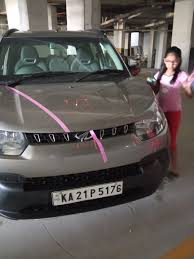
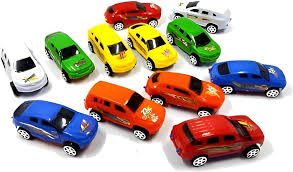
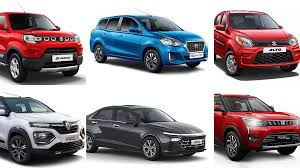
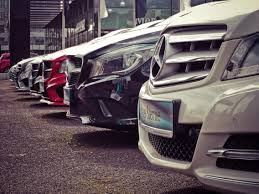
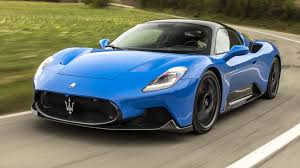
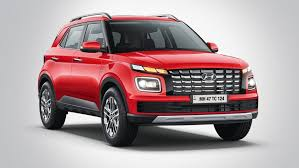
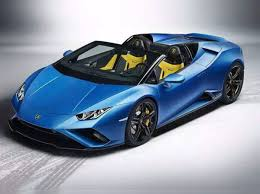
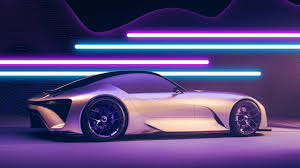
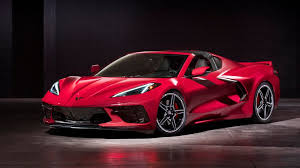
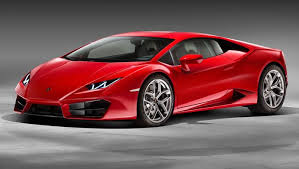

In [134]:
images1=[]
img_1=driver.find_elements(By.XPATH,'//img[@class="YQ4gaf"]')
for i in img_1:
    images1.append(i.get_attribute('src'))
images1[:10]

In [135]:
driver.quit()
driver=webdriver.Chrome()
driver.get("https:images.google.com/")
search=driver.find_element(By.XPATH,'//textarea[@class="gLFyf"]') 
search.send_keys("Machine Learning")
# search_button=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button/div/span')
# search_button.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
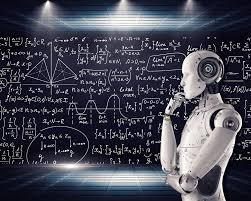
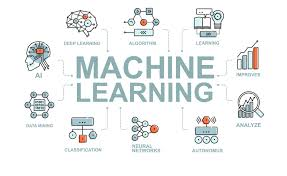
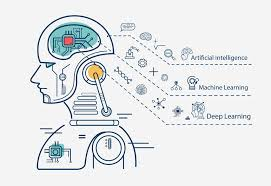
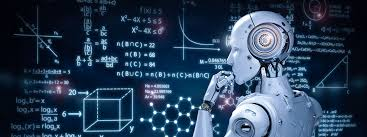
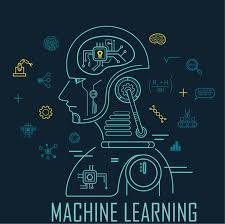
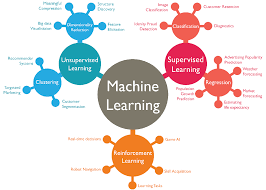
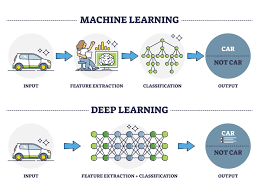
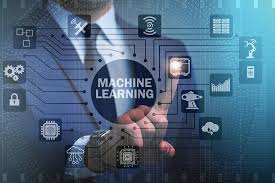
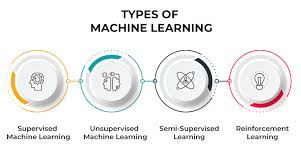
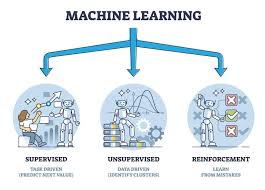

In [137]:
images2=[]
img_2=driver.find_elements(By.XPATH,'//img[@class="YQ4gaf"]')
for i in img_2:
    images2.append(i.get_attribute('src'))

images2[:10]

In [138]:
driver.quit()
driver=webdriver.Chrome()
driver.get("https:images.google.com/")
search=driver.find_element(By.XPATH,'//textarea[@class="gLFyf"]') 
search.send_keys("Guitar")
# search_button=driver.find_element(By.XPATH,'//span[@class="z1asCe MZy1Rb"]')
# search_button.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
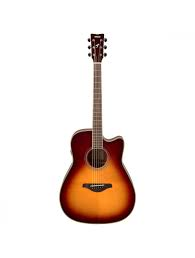
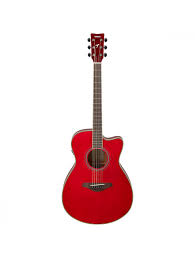
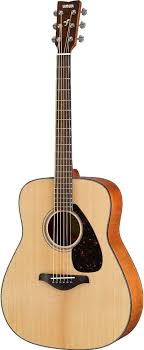
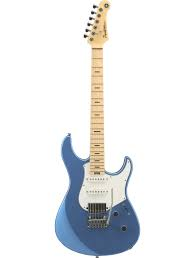
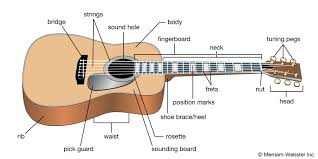
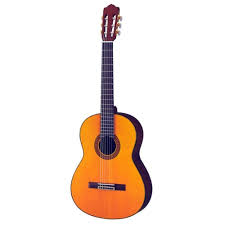
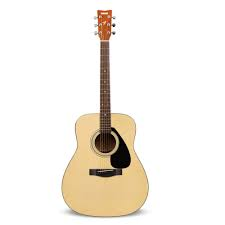
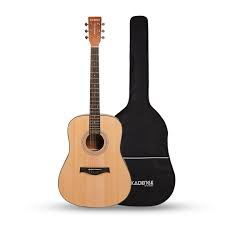
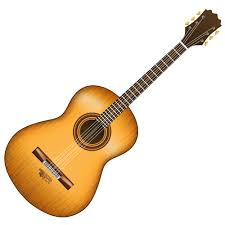
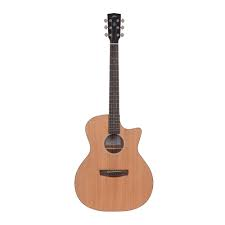

In [139]:
images3=[]
img_3=driver.find_elements(By.XPATH,'//img[@class="YQ4gaf"]')
for i in img_3:
    images3.append(i.get_attribute('src'))

images3[:10]

In [140]:
driver.quit()
driver=webdriver.Chrome()
driver.get("https:images.google.com/")
search=driver.find_element(By.XPATH,'//textarea[@class="gLFyf"]') 
search.send_keys("Cakes")
# search_button=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div/div[1]/button/div/span')
# search_button.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
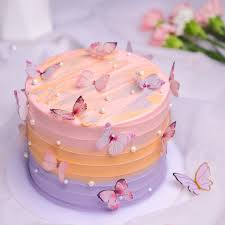
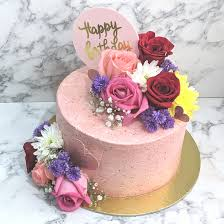
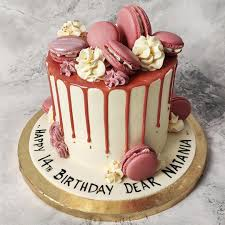
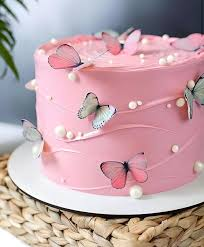
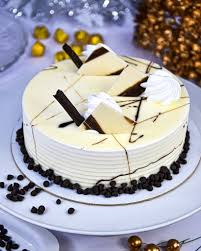
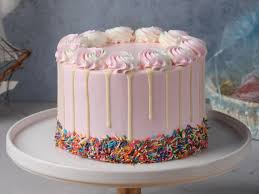
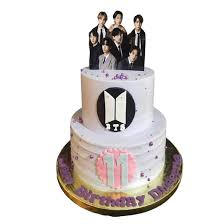
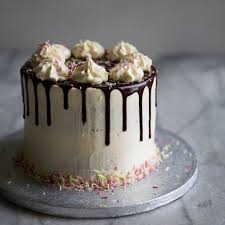
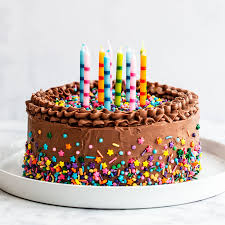
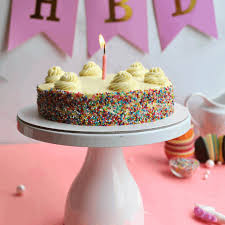

In [141]:
images4=[]
img_4=driver.find_elements(By.XPATH,'//img[@class="YQ4gaf"]')
for i in img_4:
    images4.append(i.get_attribute('src'))

images4[:10]

In [142]:
IMAGES={'Fruits':image[:10],'Cars':images1[:10],'Machine_Learning':images2[:10],'Guitar':images3[:10],'Cars':images4[:10]}

In [144]:
df=pd.DataFrame(IMAGES)
df

,Fruits,Cars,Machine_Learning,Guitar
0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
1,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
2,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
3,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
4,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
5,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
6,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
7,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
8,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
9,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."


4. Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com
and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand
Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”,
“Secondary Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the
details is missing then replace it by “- “. Save your results in a dataframe and CSV.

In [446]:
driver=webdriver.Chrome()

In [447]:
driver.get("https://www.flipkart.com/")
# driver.get("https://www.flipkart.com/search?q=smartphone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off")

In [448]:
search=driver.find_element(By.XPATH,'//input[@class="Pke_EE"]')
search.send_keys("OnePlus Nord")

In [449]:
search_btn=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[1]/div/div/div/div/div[1]/div/div/div/div[1]/div[1]/header/div[1]/div[2]/form/div/button')
search_btn.click()

In [450]:
Brand_Name=[]
SmartPhone_Name=[]
Colour=[]
RAM=[]
Storage_ROM=[]
PR_FR_Camera=[]
Display_Size=[]
Battery_Capacity=[]
Price=[]
Product_URL=[]

In [451]:
# scraping the brand name
brand=driver.find_elements(By.XPATH,'//div[@class="KzDlHZ"]')
for i in brand:
    if i.text is None:
        Brand_Name.append("-")

    else:
        Brand_Name.append(i.text.split("(")[0])

print(len(Brand_Name),Brand_Name)


24 ['OnePlus Nord CE 3 Lite 5G ', 'OnePlus Nord CE 3 Lite 5G ', 'OnePlus Nord CE 3 Lite 5G ', 'OnePlus Nord CE 3 Lite 5G ', 'OnePlus Nord CE4 ', 'OnePlus Nord CE4 ', 'OnePlus Nord CE4 ', 'OnePlus Nord CE 2 Lite 5G ', 'OnePlus Nord CE3 5G ', 'OnePlus Nord CE3 5G ', 'OnePlus Nord CE4 lite 5G ', 'OnePlus Nord CE4 lite 5G ', 'OnePlus Nord CE4 lite 5G ', 'OnePlus Nord CE 2 Lite 5G ', 'OnePlus Nord CE4 lite 5G ', 'OnePlus Nord CE3 5G ', 'OnePlus Nord CE4 lite 5G ', 'OnePlus Nord 4 5G ', 'OnePlus Nord 4 5G ', 'OnePlus Nord 4 5G ', 'OnePlus Nord 3 5G ', 'OnePlus Nord 3 5G ', 'OnePlus Nord 4 5G ', 'OnePlus Nord 4 5G ']


In [452]:
sp=driver.find_elements(By.XPATH,'//div[@class="KzDlHZ"]')
for i in sp:
    SmartPhone_Name.append(i.text.split("(")[1])

len(SmartPhone_Name)

24

In [453]:
for i in SmartPhone_Name:
    Colour.append(i.split(",")[0])

len(Colour)

24

In [454]:
#Scraping the Storage
ram=driver.find_elements(By.XPATH,'//ul[@class="G4BRas"]/li[1]')
for i in ram:
    if i.text is None:
        RAM.append("-")

    else:
        RAM.append(i.text.split("\n")[0])

print(len(RAM),RAM)
        


24 ['8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 256 GB ROM', '8 GB RAM | 256 GB ROM', '8 GB RAM | 256 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 256 GB ROM', '6 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '12 GB RAM | 256 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 256 GB ROM', '6 GB RAM | 128 GB ROM', '8 GB RAM | 256 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 256 GB ROM', '8 GB RAM | 256 GB ROM', '8 GB RAM | 256 GB ROM', '8 GB RAM | 256 GB ROM', '8 GB RAM | 128 GB ROM', '16 GB RAM | 256 GB ROM', '12 GB RAM | 256 GB ROM', '12 GB RAM | 256 GB ROM']


In [455]:
RAM_Storage=[]
for i in RAM:
    RAM_Storage.append(i.split("|")[0])

len(RAM_Storage)

24

In [456]:
for i in RAM:
    Storage_ROM.append(i.split("|")[1])

len(Storage_ROM)

24

In [457]:
#Scraping PR_FR_Camera
camera=driver.find_elements(By.XPATH,'//ul[@class="G4BRas"]/li[3]')
for i in camera:
    if i.text is None:
        PR_FR_Camera.append("-")

    else:
        PR_FR_Camera.append(i.text)

print(len(PR_FR_Camera),PR_FR_Camera)
        

24 ['108MP Rear Camera', '108MP Rear Camera', '108MP Rear Camera', '108MP Rear Camera', '50MP Rear Camera', '50MP Rear Camera', '50MP Rear Camera', '64MP Rear Camera | 16MP Front Camera', '50MP Rear Camera', '50MP Rear Camera', '50MP Rear Camera', '50MP Rear Camera', '50MP Rear Camera', '64MP Rear Camera | 16MP Front Camera', '50MP Rear Camera', '50MP Rear Camera | 16MP Front Camera', '50MP Rear Camera', '50MP Rear Camera', '50MP Rear Camera', '50MP Rear Camera', '50MP Rear Camera', '50MP Rear Camera', '50MP Rear Camera', '50MP Rear Camera']


In [458]:
# Scraping display size
ds=driver.find_elements(By.XPATH,'//ul[@class="G4BRas"]/li[2]')
for i in ds:
    if i.text is None:
        Display_Size.append("-")

    else:
        Display_Size.append(i.text)

print(len(Display_Size),Display_Size)

24 ['17.07 cm (6.72 inch) Display', '17.07 cm (6.72 inch) Display', '17.07 cm (6.72 inch) Display', '17.07 cm (6.72 inch) Display', '17.02 cm (6.7 inch) Display', '17.02 cm (6.7 inch) Display', '17.02 cm (6.7 inch) Display', '16.74 cm (6.59 inch) Display', '17.02 cm (6.7 inch) Display', '17.02 cm (6.7 inch) Display', '16.94 cm (6.67 inch) Display', '16.94 cm (6.67 inch) Display', '16.94 cm (6.67 inch) Display', '16.74 cm (6.59 inch) Display', '16.94 cm (6.67 inch) Display', '17.02 cm (6.7 inch) Display', '16.94 cm (6.67 inch) Display', '17.12 cm (6.74 inch) Display', '17.12 cm (6.74 inch) Display', '17.12 cm (6.74 inch) Display', '17.12 cm (6.74 inch) Display', '17.12 cm (6.74 inch) Display', '17.12 cm (6.74 inch) Display', '17.12 cm (6.74 inch) Display']


In [459]:
# Scraping batter capacity
bc=driver.find_elements(By.XPATH,'//ul[@class="G4BRas"]/li[4]')
for i in bc:
    if i.text is None:
        Battery_Capacity.append("-")

    else:
        Battery_Capacity.append(i.text)

print(len(Battery_Capacity),Battery_Capacity)

24 ['5000 mAh Battery', '5000 mAh Battery', '5000 mAh Battery', '5000 mAh Battery', '5500 mAh Battery', '5500 mAh Battery', '5500 mAh Battery', '5000 mAh Battery', '5000 mAh Battery', '5000 mAh Battery', '5500 mAh Battery', '5500 mAh Battery', '5500 mAh Battery', '5000 mAh Battery', '5500 mAh Battery', '5000 mAh Battery', '5500 mAh Battery', '5500 mAh Battery', '5500 mAh Battery', '5500 mAh Battery', '5000 mAh Battery', '5000 mAh Battery', '5500 mAh Battery', '5500 mAh Battery']


In [460]:
#Scraping the price
price=driver.find_elements(By.XPATH,'//div[@class="Nx9bqj _4b5DiR"]')
for i in price:
    if i.text is None:
        Price.append("-")

    else:
        Price.append(i.text)

print(len(Price),Price)

24 ['₹16,097', '₹16,047', '₹17,534', '₹18,470', '₹26,790', '₹24,350', '₹26,890', '₹16,615', '₹18,831', '₹26,999', '₹19,707', '₹20,064', '₹22,192', '₹16,768', '₹22,488', '₹19,333', '₹21,995', '₹32,344', '₹32,997', '₹32,345', '₹22,900', '₹36,999', '₹35,180', '₹35,599']


In [461]:
# Scrapping the url
url=driver.find_elements(By.XPATH,'//a[@class="CGtC98"]')
for i in url:
    if i.text is None:
        Product_URL.append("-")

    else:
        Product_URL.append(i.get_attribute('href'))

print(len(Product_URL),Product_URL)

24 ['https://www.flipkart.com/oneplus-nord-ce-3-lite-5g-chromatic-gray-128-gb/p/itm2cd5a4e659035?pid=MOBGZJ42KHUZZKMN&lid=LSTMOBGZJ42KHUZZKMNNZJMSB&marketplace=FLIPKART&q=OnePlus+Nord&store=tyy%2F4io&spotlightTagId=BestsellerId_tyy%2F4io&srno=s_1_1&otracker=search&otracker1=search&fm=organic&iid=84884f19-9ebe-4166-adff-b808754546bf.MOBGZJ42KHUZZKMN.SEARCH&ppt=hp&ppn=homepage&ssid=uxl7wbr0j40000001726734438319&qH=affdc902290cef81', 'https://www.flipkart.com/oneplus-nord-ce-3-lite-5g-pastel-lime-128-gb/p/itm2cd5a4e659035?pid=MOBGZJ3WM5SGTGVZ&lid=LSTMOBGZJ3WM5SGTGVZKIFVYT&marketplace=FLIPKART&q=OnePlus+Nord&store=tyy%2F4io&srno=s_1_2&otracker=search&otracker1=search&fm=organic&iid=84884f19-9ebe-4166-adff-b808754546bf.MOBGZJ3WM5SGTGVZ.SEARCH&ppt=hp&ppn=homepage&ssid=uxl7wbr0j40000001726734438319&qH=affdc902290cef81', 'https://www.flipkart.com/oneplus-nord-ce-3-lite-5g-pastel-lime-256-gb/p/itm2cd5a4e659035?pid=MOBGZJ3ZFQ8AKKRS&lid=LSTMOBGZJ3ZFQ8AKKRS488YYT&marketplace=FLIPKART&q=OnePlus+Nor

In [462]:
data={"Brand_Name":Brand_Name,"SmartPhone_Name":SmartPhone_Name,"Colour":Colour,"RAM_Storage":RAM_Storage,"Storage_ROM":Storage_ROM,"PR_FR_Camera":PR_FR_Camera,"Display_Size":Display_Size,
      "Battery_Capacity":Battery_Capacity,"Price":Price,"Product_URL":Product_URL}
df=pd.DataFrame(data)
df

,Brand_Name,SmartPhone_Name,Colour,RAM_Storage,Storage_ROM,PR_FR_Camera,Display_Size,Battery_Capacity,Price,Product_URL
0,OnePlus Nord CE 3 Lite 5G,"Chromatic Gray, 128 GB)",Chromatic Gray,8 GB RAM,128 GB ROM,108MP Rear Camera,17.07 cm (6.72 inch) Display,5000 mAh Battery,"₹16,097",https://www.flipkart.com/oneplus-nord-ce-3-lit...
1,OnePlus Nord CE 3 Lite 5G,"Pastel Lime, 128 GB)",Pastel Lime,8 GB RAM,128 GB ROM,108MP Rear Camera,17.07 cm (6.72 inch) Display,5000 mAh Battery,"₹16,047",https://www.flipkart.com/oneplus-nord-ce-3-lit...
2,OnePlus Nord CE 3 Lite 5G,"Pastel Lime, 256 GB)",Pastel Lime,8 GB RAM,256 GB ROM,108MP Rear Camera,17.07 cm (6.72 inch) Display,5000 mAh Battery,"₹17,534",https://www.flipkart.com/oneplus-nord-ce-3-lit...
3,OnePlus Nord CE 3 Lite 5G,"Chromatic Gray, 256 GB)",Chromatic Gray,8 GB RAM,256 GB ROM,108MP Rear Camera,17.07 cm (6.72 inch) Display,5000 mAh Battery,"₹18,470",https://www.flipkart.com/oneplus-nord-ce-3-lit...
4,OnePlus Nord CE4,"Dark Chrome, 256 GB)",Dark Chrome,8 GB RAM,256 GB ROM,50MP Rear Camera,17.02 cm (6.7 inch) Display,5500 mAh Battery,"₹26,790",https://www.flipkart.com/oneplus-nord-ce4-dark...
5,OnePlus Nord CE4,"Dark Chrome, 128 GB)",Dark Chrome,8 GB RAM,128 GB ROM,50MP Rear Camera,17.02 cm (6.7 inch) Display,5500 mAh Battery,"₹24,350",https://www.flipkart.com/oneplus-nord-ce4-dark...
6,OnePlus Nord CE4,"Celadon Marble, 256 GB)",Celadon Marble,8 GB RAM,256 GB ROM,50MP Rear Camera,17.02 cm (6.7 inch) Display,5500 mAh Battery,"₹26,890",https://www.flipkart.com/oneplus-nord-ce4-cela...
7,OnePlus Nord CE 2 Lite 5G,"Black Dusk, 128 GB)",Black Dusk,6 GB RAM,128 GB ROM,64MP Rear Camera | 16MP Front Camera,16.74 cm (6.59 inch) Display,5000 mAh Battery,"₹16,615",https://www.flipkart.com/oneplus-nord-ce-2-lit...
8,OnePlus Nord CE3 5G,"Grey Shimmer, 128 GB)",Grey Shimmer,8 GB RAM,128 GB ROM,50MP Rear Camera,17.02 cm (6.7 inch) Display,5000 mAh Battery,"₹18,831",https://www.flipkart.com/oneplus-nord-ce3-5g-g...
9,OnePlus Nord CE3 5G,"Aqua Surge, 256 GB)",Aqua Surge,12 GB RAM,256 GB ROM,50MP Rear Camera,17.02 cm (6.7 inch) Display,5000 mAh Battery,"₹26,999",https://www.flipkart.com/oneplus-nord-ce3-5g-a...


In [463]:
df.to_csv("smartphone.csv",index=False)

5. Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps.

In [2]:
import re

In [228]:
driver=webdriver.Chrome()

In [229]:
driver.get("https://www.google.co.in/maps")

In [231]:
city=input("Enter a City name:")
search=driver.find_element(By.XPATH,'//input[@class="fontBodyMedium searchboxinput xiQnY "]')
search.clear()
time.sleep(2)
search.send_keys(city)
button=driver.find_element(By.XPATH,'//div[@class="pzfvzf"]')
button.click()
time.sleep(3)

try:
    url_str=driver.current_url
    print("URL Extracter:",url_str)
    lat_lng=re.findall(r'@(.*)data',url_str)
    if len(lat_lng):
        lat_lng_list=lat_lng[0].split(",")
        if len(lat_lng_list)>=2:
            lat=lat_lng_list[0]
            lng=lat_lng_list[1]

        print("Latitude = {},Longitude = {}".format(lat,lng))

except Exception as e:
    print("Error:", str(e))
        
            

Enter a City name: Bangalore


URL Extracter: https://www.google.co.in/maps/place/Bengaluru,+Karnataka/@12.9625538,77.7337516,15z/data=!4m6!3m5!1s0x3bae1670c9b44e6d:0xf8dfc3e8517e4fe0!8m2!3d12.9715987!4d77.5945627!16zL20vMDljMTc?entry=ttu&g_ep=EgoyMDI0MDkxMS4wIKXMDSoASAFQAw%3D%3D
Latitude = 12.9625538,Longitude = 77.7337516


6. Write a program to scrap all the available details of best gaming laptops from digit.in.

In [254]:
driver=webdriver.Chrome()

In [255]:
driver.get("https://www.digit.in/?s=gaming+laptop&post_type=product")

In [237]:
Brands=[]
Description=[]
Specification=[]
Price=[]

In [276]:
brand=driver.find_elements(By.XPATH,'//h3[@class=" text-clamp text-clamp-2"]')
len(brand)

12

In [277]:
for i in brand:
    Brands.append(str(i.text).replace("/n",""))

Brands[:12]

['Acer ALG Gaming Laptop AL15G-52',
 'Acer ALG Gaming Laptop AL15G-52',
 'HP Victus Gaming Laptop fa1373TX/fa1227TX',
 'HP Victus 15 Gaming Laptop (AMD Ryzen 5600H + 16GB RAM)',
 'Victus Gaming Laptop 15-fb0169ax',
 'HP Victus Gaming Laptop 15 Fb1018Ax',
 'HP Victus Gaming Laptop 15 fb2117AX',
 'HP Victus Gaming Laptop 16-S0095Ax',
 'HP OMEN Transcend Gaming Laptop 14-fb0089TX',
 'Dell Alienware m18 R1 Gaming Laptop',
 'HP Omen Gaming Laptop (16-xf0059AX)',
 'HP Omen Gaming Laptop (16-wf1025TX)']

In [245]:
urls=[]
url=driver.find_elements(By.XPATH,'//a[@class="img-centered-flex rh-flex-justify-center rh-flex-center-align"]')
len(url)


12

In [246]:
for i in url:
    urls.append(i.get_attribute('href'))

urls    

                

['https://www.digit.in/laptops/acer-alg-gaming-laptop-al15g-52-price.html',
 'https://www.digit.in/laptops/hp-victus-gaming-laptop-fa1373tx-fa1227tx-price.html',
 'https://www.digit.in/laptops/hp-victus-15-gaming-laptop-amd-ryzen-5600h-16gb-ram-price.html',
 'https://www.digit.in/laptops/victus-gaming-laptop-15-fb0169ax-price.html',
 'https://www.digit.in/laptops/hp-victus-gaming-laptop-15-fb1018ax-price.html',
 'https://www.digit.in/laptops/hp-victus-gaming-laptop-15-fb2117ax-price.html',
 'https://www.digit.in/laptops/hp-victus-gaming-laptop-16-s0095ax-price.html',
 'https://www.digit.in/laptops/hp-omen-transcend-gaming-laptop-14-fb0089tx-price.html',
 'https://www.digit.in/laptops/dell-alienware-m18-r1-gaming-laptop-price.html',
 'https://www.digit.in/laptops/hp-omen-gaming-laptop-16-xf0059ax-price.html',
 'https://www.digit.in/laptops/hp-omen-gaming-laptop-16-wf1025tx-price.html',
 'https://www.digit.in/laptops/hp-omen-gaming-laptop-16-xd0007ax.html']

In [248]:
for i in urls:
    driver.get(i)
    time.sleep(2)
    try:
        des=driver.find_element(By.XPATH,'//div[@class="rate_bar_wrap"]')
        Description.append(des.text)

    except NoSuchElementException:
        Description.append("Not Present")

In [271]:
print(len(Description),(Description))

12 ['8.1\nEXPERT SCORE\nAcer ALG Gaming Laptop AL15G-52\nPerformance\n8.1\nFeatures and Spec\n7.8\nBuild\n7.3\nValue for Money\n9.2\nPROS\nAffordable Price\nDecent Gaming Performance\nWide Range of Ports\nCONS\nSlower RAM\nThe lid flexes a lot\nLower GPU TGP', 'Not Present', 'Not Present', 'Not Present', 'Not Present', 'Not Present', 'Not Present', '7.8\nEXPERT SCORE\nPerformance\n8.6\nFeatures and spec\n7.1\nDesign\n8\nValue for money\n7.4', 'Not Present', 'Not Present', '8.1\nEXPERT SCORE\nHP Omen Gaming Laptop\nPerformance\n7.9\nFeatures and Spec:\n8.1\nBuild\n7.4\nValue for Money\n9.1\nPROS\nExceptional Performance\nHigh-speed RAM and Storage\nGood 16.1-inch 165 Hz display\nCONS\nSurface Heat\nCramped Keyboard Layout', 'Not Present']


In [252]:
for i in urls:
    driver.get(i)
    time.sleep(2)
    try:
        spec=driver.find_element(By.XPATH,'//div[@class="key_specifications "]')
        Specification.append(spec.text)

    except NoSuchElementException:
        Specification.append("Not Present")


In [270]:
print(len(Specification),(Specification))

12 ['Key Specifications\nOperating System (With\nWindows 11 Home\nDisplay Size (In Inches)\n15.6\nProcessor Model Name\n12th Gen Intel Core I5-12450H\nStorage Drive Capacity\n512 GB', 'Not Present', 'Not Present', 'Not Present', 'Not Present', 'Not Present', 'Not Present', 'Key Specifications\nOperating System (With\nWindows 11 Home\nDisplay Size (In Inches)\n14\nProcessor Model Name\nIntel Core Ultra 7-155H\nStorage Drive Capacity\n1 TB', 'Key Specifications\nOperating System (With\nWindows 11 Home\nDisplay Size (In Inches)\n18\nProcessor Model Name\n13th Gen Intel Core I9-13980HX\nStorage Drive Capacity\n1 TB', 'Key Specifications\nOperating System (With\nWindows 11 Home\nDisplay Size (In Inches)\n16.1\nProcessor Model Name\nAMD Ryzen 7-7840HS\nStorage Drive Capacity\n512 GB', 'Key Specifications\nOperating System (With\nWindows 11 Home\nDisplay Size (In Inches)\n16.1\nProcessor Model Name\n14th Gen Intel Core I7-14700HX\nStorage Drive Capacity\n1 TB', 'Key Specifications\nOperating 

In [263]:
price=driver.find_elements(By.XPATH,'//div[@class="cegg-price cegg-price-color cegg-price-instock"]')
for i in price:
    if i.text is None:
        Price.append("Not Present")
    else:
        Price.append(i.text)





In [272]:
print(len(Price),(Price))

12 ['Rs. 62,949', 'Rs. 62,949', 'Rs. 58,799', 'Rs. 61,990', 'Rs. 54,680', 'Rs. 56,480', 'Rs. 97,990', 'Rs. 79,800', 'Rs. 154,990', 'Rs. 451,190', 'Rs. 272', 'Rs. 272']


In [275]:
print(len(Brands),len(Description),len(Specification),len(Price))

13 12 12 12


In [278]:
data={"Brands":Brands[:12],
"Description":Description,
"Specification":Specification,
"Price":Price}

In [279]:
df=pd.DataFrame(data)
df

,Brands,Description,Specification,Price
0,Acer ALG Gaming Laptop AL15G-52,8.1\nEXPERT SCORE\nAcer ALG Gaming Laptop AL15...,Key Specifications\nOperating System (With\nWi...,"Rs. 62,949"
1,Acer ALG Gaming Laptop AL15G-52,Not Present,Not Present,"Rs. 62,949"
2,HP Victus Gaming Laptop fa1373TX/fa1227TX,Not Present,Not Present,"Rs. 58,799"
3,HP Victus 15 Gaming Laptop (AMD Ryzen 5600H + ...,Not Present,Not Present,"Rs. 61,990"
4,Victus Gaming Laptop 15-fb0169ax,Not Present,Not Present,"Rs. 54,680"
5,HP Victus Gaming Laptop 15 Fb1018Ax,Not Present,Not Present,"Rs. 56,480"
6,HP Victus Gaming Laptop 15 fb2117AX,Not Present,Not Present,"Rs. 97,990"
7,HP Victus Gaming Laptop 16-S0095Ax,7.8\nEXPERT SCORE\nPerformance\n8.6\nFeatures ...,Key Specifications\nOperating System (With\nWi...,"Rs. 79,800"
8,HP OMEN Transcend Gaming Laptop 14-fb0089TX,Not Present,Key Specifications\nOperating System (With\nWi...,"Rs. 154,990"
9,Dell Alienware m18 R1 Gaming Laptop,Not Present,Key Specifications\nOperating System (With\nWi...,"Rs. 451,190"


7. Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped:
“Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”.

In [464]:
driver=webdriver.Chrome()

In [465]:
driver.get("https://www.forbes.com/")

In [466]:
dots=driver.find_element(By.XPATH,'//div[@class="USVF4LaM"]')
dots.click()

In [467]:
Billionaire=driver.find_element(By.XPATH,'/html/body/div[1]/header/div/header/div[1]/div[1]/div[2]/ul/li[2]/div[1]')
Billionaire.click()

In [469]:
World_Billionaire=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[1]/header/div[1]/div[1]/div[2]/ul/li[2]/div[2]/div[3]/ul/li[1]/a')
World_Billionaire.click()

In [470]:
Rank=[]
rank=driver.find_elements(By.XPATH,'//div[@class="Table_rank__X4MKf"]/div')
for i in rank:
    Rank.append(i.text)

In [471]:
Rank

['1.',
 '2.',
 '3.',
 '4.',
 '5.',
 '6.',
 '7.',
 '8.',
 '9.',
 '10.',
 '11.',
 '12.',
 '13.',
 '14.',
 '15.',
 '16.',
 '17.',
 '18.',
 '19.',
 '20.',
 '21.',
 '22.',
 '23.',
 '24.',
 '25.',
 '26.',
 '27.',
 '27.',
 '29.',
 '30.',
 '31.',
 '32.',
 '33.',
 '34.',
 '35.',
 '35.',
 '37.',
 '38.',
 '39.',
 '40.',
 '40.',
 '42.',
 '43.',
 '44.',
 '45.',
 '46.',
 '46.',
 '48.',
 '48.',
 '50.',
 '51.',
 '52.',
 '53.',
 '54.',
 '55.',
 '56.',
 '57.',
 '58.',
 '59.',
 '60.',
 '60.',
 '62.',
 '63.',
 '64.',
 '65.',
 '66.',
 '66.',
 '68.',
 '69.',
 '70.',
 '71.',
 '71.',
 '73.',
 '73.',
 '75.',
 '76.',
 '76.',
 '76.',
 '79.',
 '80.',
 '81.',
 '81.',
 '83.',
 '84.',
 '85.',
 '86.',
 '87.',
 '88.',
 '89.',
 '90.',
 '91.',
 '92.',
 '92.',
 '94.',
 '94.',
 '94.',
 '97.',
 '98.',
 '99.',
 '100.',
 '101.',
 '102.',
 '103.',
 '104.',
 '104.',
 '104.',
 '107.',
 '108.',
 '109.',
 '110.',
 '111.',
 '111.',
 '113.',
 '113.',
 '115.',
 '115.',
 '117.',
 '118.',
 '118.',
 '120.',
 '121.',
 '122.',
 '122.',
 

In [479]:
len(Rank)

200

In [472]:
Name=[]
name=driver.find_elements(By.XPATH,'//div[@class="Table_personName__Bus2E"]')
for i in name:
    Name.append(i.text)

Name

['Bernard Arnault & family',
 'Elon Musk',
 'Jeff Bezos',
 'Mark Zuckerberg',
 'Larry Ellison',
 'Warren Buffett',
 'Bill Gates',
 'Steve Ballmer',
 'Mukesh Ambani',
 'Larry Page',
 'Sergey Brin',
 'Michael Bloomberg',
 'Amancio Ortega',
 'Carlos Slim Helu & family',
 'Francoise Bettencourt Meyers & family',
 'Michael Dell',
 'Gautam Adani',
 'Jim Walton & family',
 'Rob Walton & family',
 'Jensen Huang',
 'Alice Walton',
 'David Thomson & family',
 'Julia Koch & family',
 'Zhong Shanshan',
 'Charles Koch & family',
 'Giovanni Ferrero',
 'Prajogo Pangestu',
 'Zhang Yiming',
 'Tadashi Yanai & family',
 'Phil Knight & family',
 'Mark Mateschitz',
 'Klaus-Michael Kuehne',
 'Colin Huang',
 'Stephen Schwarzman',
 'Jacqueline Mars',
 'John Mars',
 'Dieter Schwarz',
 'Li Ka-shing',
 'Shiv Nadar',
 'Alain Wertheimer',
 'Gerard Wertheimer',
 'Ken Griffin',
 'MacKenzie Scott',
 'Thomas Peterffy',
 'Reinhold Wuerth & family',
 'William Ding',
 'Savitri Jindal & family',
 'Gianluigi Aponte',
 'Raf

In [480]:
len(Name)

200

In [473]:
Net_Worth=[]
net=driver.find_elements(By.XPATH,'//div[@class="Table_finalWorth__UZA6k"]')
for i in net:
    Net_Worth.append(i.text)

Net_Worth

['$233 B',
 '$195 B',
 '$194 B',
 '$177 B',
 '$141 B',
 '$133 B',
 '$128 B',
 '$121 B',
 '$116 B',
 '$114 B',
 '$110 B',
 '$106 B',
 '$103 B',
 '$102 B',
 '$99.5 B',
 '$91 B',
 '$84 B',
 '$78.4 B',
 '$77.4 B',
 '$77 B',
 '$72.3 B',
 '$67.8 B',
 '$64.3 B',
 '$62.3 B',
 '$58.5 B',
 '$43.8 B',
 '$43.4 B',
 '$43.4 B',
 '$42.8 B',
 '$40.9 B',
 '$39.6 B',
 '$39.2 B',
 '$38.9 B',
 '$38.8 B',
 '$38.5 B',
 '$38.5 B',
 '$38 B',
 '$37.3 B',
 '$36.9 B',
 '$36.8 B',
 '$36.8 B',
 '$36.4 B',
 '$35.6 B',
 '$34 B',
 '$33.6 B',
 '$33.5 B',
 '$33.5 B',
 '$33.1 B',
 '$33.1 B',
 '$33 B',
 '$32.7 B',
 '$32.1 B',
 '$32 B',
 '$31.6 B',
 '$31.4 B',
 '$30.8 B',
 '$30.2 B',
 '$29 B',
 '$28.6 B',
 '$28 B',
 '$28 B',
 '$27.9 B',
 '$27.7 B',
 '$27.6 B',
 '$27.5 B',
 '$27.4 B',
 '$27.4 B',
 '$27.3 B',
 '$26.7 B',
 '$26.6 B',
 '$26.5 B',
 '$26.5 B',
 '$26.2 B',
 '$26.2 B',
 '$25.7 B',
 '$25.5 B',
 '$25.5 B',
 '$25.5 B',
 '$25.2 B',
 '$25.1 B',
 '$24.5 B',
 '$24.5 B',
 '$24.3 B',
 '$24 B',
 '$23.7 B',
 '$23.4 B',
 '$2

In [481]:
len(Net_Worth)

200

In [514]:
Industry=[]
ind=driver.find_elements(By.XPATH,'/html/body/div[1]/div[2]/div/div/div[3]/div[2]/div[2]/div/div[1]/div[2]/div[4]/div/div')
for i in ind:
    Industry.append(i.text)


Industry


['INDUSTRY']

In [487]:
len(Industry)

800

In [478]:
data={"Rank":Rank,"Name":Name,"Net_Worth":Net_Worth,"Industry":Industry}
df=pd.DataFrame(data)
df

ValueError: All arrays must be of the same length

8. Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted
from any YouTube Video.

In [202]:
driver=webdriver.Chrome()

In [203]:
driver.get("https://www.youtube.com/")

In [204]:
driver.maximize_window()

In [205]:
search=driver.find_element(By.XPATH,'//input[@id="search"]')
search.send_keys("Machine Learning")

In [207]:
search_btn=driver.find_element(By.XPATH,'/html/body/ytd-app/div[1]/div/ytd-masthead/div[4]/div[2]/ytd-searchbox/button')
search_btn.click()

In [211]:
ML=driver.find_element(By.XPATH,'//button[@class="ytp-play-button ytp-button"]')
ML.click()
time.sleep(5)

AttributeError: 'list' object has no attribute 'sleep'

In [214]:
Comments=[]
for i in range(20):
    driver.execute_script("window.scrollBy(0,1000)")
    comments=driver.find_elements(By.XPATH,'//yt-attributed-string[@class="style-scope ytd-comment-view-model"]')
    for i in comments:
        Comments.append(i.text)

Comments[:500]
print(len(Comments[:500]))


500


In [215]:
Upvote=[]
for i in range(20):
    driver.execute_script("window.scrollBy(0,1000)")
    upvote=driver.find_elements(By.XPATH,'//span[@class="style-scope ytd-comment-engagement-bar"]')
    for i in upvote:
        Upvote.append(i.text)

Upvote[:500]
print(len(Upvote[:500]))
    

500


In [217]:
Time=[]
for i in range(20):
    driver.execute_script("window.scrollBy(0,1000)")
    time=driver.find_elements(By.XPATH,'//span[@class="style-scope ytd-comment-view-model"]/a')
    for i in time:
        Time.append(i.text)

Time[:500]



['4 years ago (edited)',
 '2 years ago',
 '4 years ago',
 '3 years ago',
 '3 years ago',
 '4 years ago',
 '3 years ago',
 '4 years ago (edited)',
 '4 years ago',
 '4 years ago',
 '4 years ago',
 '4 years ago',
 '2 years ago',
 '3 years ago',
 '4 years ago',
 '4 years ago',
 '4 years ago',
 '4 years ago',
 '4 years ago',
 '3 years ago',
 '3 years ago',
 '3 years ago',
 '4 years ago',
 '4 years ago',
 '2 years ago',
 '2 years ago',
 '2 years ago',
 '1 year ago',
 '2 years ago',
 '4 years ago',
 '4 years ago',
 '4 years ago',
 '4 years ago',
 '2 years ago',
 '2 years ago',
 '2 years ago',
 '2 years ago',
 '4 years ago',
 '4 years ago',
 '4 years ago',
 '1 year ago',
 '4 years ago',
 '2 years ago',
 '2 years ago',
 '2 years ago',
 '2 years ago',
 '1 year ago',
 '4 years ago',
 '2 years ago (edited)',
 '4 years ago',
 '3 years ago',
 '2 years ago',
 '2 years ago',
 '1 year ago',
 '4 years ago',
 '4 years ago',
 '3 years ago',
 '4 years ago',
 '4 years ago',
 '4 years ago (edited)',
 '4 year

In [218]:
data={"Comments":Comments[:500],"Upvote":Upvote[:500],"Time":Time[:500]}
df=pd.DataFrame(data)
df

,Comments,Upvote,Time
0,Got a question on the topic? Please share it i...,298,4 years ago (edited)
1,00:00 Introduction\n2:47 What is Machine Learn...,859,2 years ago
2,2 semesters worth of classes in one vid. Thanks,1.2K,4 years ago
3,"this is literally a piece of god, 10 hr video ...",295,3 years ago
4,The best training I had seen till now on youtu...,158,3 years ago
...,...,...,...
495,edureka team thanks a ton for taking these sec...,18,1 year ago
496,Please make more courses on NLP : Crash Course...,53,11 months ago
497,Ohh! Thanks a lot. \nFinally i got this.,88,4 years ago
498,Literally thanks from my bottom of my heart,39,3 years ago


9. Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in
“London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overall
reviews, privates from price, dorms from price, facilities and property description.

In [361]:
driver=webdriver.Chrome()

In [362]:
driver.get("https://www.hostelworld.com/")

In [363]:
search=driver.find_element(By.XPATH,'/html/body/div[3]/div/div[3]/main/header/div/div[2]/div[1]/div[1]/div/div[1]/div[1]/div/div[2]/label/input')
search.send_keys("London")

In [364]:
search_btn=driver.find_element(By.XPATH,'/html/body/div[3]/div/div[3]/main/header/div/div[2]/div[1]/div[1]/div/div[5]/button[1]')
search_btn.click()

In [366]:
Hostel_Name=[]
name=driver.find_elements(By.XPATH,'//div[@class="property-name"]')
for i in name:
    Hostel_Name.append(i.text)

Hostel_Name[:30]

['Palmers Lodge - Swiss Cottage',
 "St Christopher's Village",
 'Generator London',
 "Wombat's City Hostel London",
 'Palmers Lodge - Swiss Cottage',
 'Urbany Hostel London',
 "St Christopher's Village",
 'Generator London',
 'Clink261',
 'Astor Museum Inn',
 'No.8 Willesden Hostel London',
 'Safestay London Kensington Holland Park',
 'Safestay London Elephant & Castle',
 'Smart Russell Square Hostel',
 'Queen Elizabeth Chelsea',
 'Saint James Backpackers',
 'Astor Hyde Park',
 'Phoenix Hostel',
 'Smart Hyde Park Inn Hostel',
 'Astor Victoria',
 "St Christopher's Hammersmith",
 'Kabannas London St Pancras',
 'International Students House',
 "St Christopher's Camden",
 "St Christopher's Greenwich",
 "St Christopher's Inn - London Bridge",
 'Park Villa',
 'YHA London Earls Court',
 'Astor Kensington',
 'PubLove @ The Rose & Crown']

In [367]:
Distance=[]
distance=driver.find_elements(By.XPATH,'//span[@class="distance-description"]')
for i in distance:
    Distance.append(i.text)
Distance[:30]

['- 3.6km from city centre',
 '- 6.5km from city centre',
 '- 5.4km from city centre',
 '- 1.8km from city centre',
 '- 3km from city centre',
 '- 3.2km from city centre',
 '- 2.2km from city centre',
 '- 10km from city centre',
 '- 5.8km from city centre',
 '- 1.7km from city centre',
 '- 2.6km from city centre',
 '- 5.7km from city centre',
 '- 5.5km from city centre',
 '- 4.3km from city centre',
 '- 4.2km from city centre',
 '- 5km from city centre',
 '- 1.8km from city centre',
 '- 7.5km from city centre',
 '- 3.3km from city centre',
 '- 3.3km from city centre',
 '- 4.3km from city centre',
 '- 7.6km from city centre',
 '- 1.8km from city centre',
 '- 6.3km from city centre',
 '- 5.1km from city centre',
 '- 4.9km from city centre',
 '- 1.6km from city centre',
 '- 7km from city centre',
 '- 4.2km from city centre',
 '- 2.4km from city centre']

In [368]:
# Dont know why it didnt work

Ratings=[]
ratings=driver.find_elements(By.XPATH,'//span[@class="score"]')
for i in ratings:
    Ratings.append(i.text)

Ratings[:30]

['8.7',
 '7.9',
 '7.0',
 '9.3',
 '8.7',
 '9.6',
 '7.9',
 '7.0',
 '8.1',
 '8.8',
 '7.2',
 '7.1',
 '6.9',
 '7.5',
 '7.5',
 '8.1',
 '7.8',
 '6.9',
 '7.6',
 '7.3',
 '7.7',
 '8.1',
 '9.0',
 '7.5',
 '7.7',
 '6.9',
 '9.0',
 '9.1',
 '7.5',
 '7.9']

In [369]:
Total_Reviews=[]
ts=driver.find_elements(By.XPATH,'//span[@class="num-reviews left-margin"]')
for i in ts:
    Total_Reviews.append(i.text)

Total_Reviews[:30]

['(16995)',
 '(16420)',
 '(1454)',
 '(13262)',
 '(8466)',
 '(791)',
 '(9627)',
 '(5333)',
 '(1978)',
 '(5441)',
 '(10357)',
 '(3870)',
 '(2015)',
 '(12438)',
 '(4877)',
 '(6898)',
 '(15202)',
 '(4511)',
 '(3090)',
 '(1136)',
 '(4221)',
 '(3525)',
 '(3702)',
 '(947)',
 '(1507)',
 '(6640)',
 '(279)',
 '(893)',
 '(240)',
 '(480)']

In [370]:
Overall_Reviews=[]
ovrall=driver.find_elements(By.XPATH,'//span[@class="keyword"]')
for i in ovrall:
    Overall_Reviews.append(i.text)

Overall_Reviews[:30]

['Fabulous',
 'Very Good',
 'Very Good',
 'Superb',
 'Fabulous',
 'Superb',
 'Very Good',
 'Very Good',
 'Fabulous',
 'Fabulous',
 'Very Good',
 'Very Good',
 'Good',
 'Very Good',
 'Very Good',
 'Fabulous',
 'Very Good',
 'Good',
 'Very Good',
 'Very Good',
 'Very Good',
 'Fabulous',
 'Superb',
 'Very Good',
 'Very Good',
 'Good',
 'Superb',
 'Superb',
 'Very Good',
 'Very Good']

In [371]:
Private_From_Price=[]
pfp=driver.find_elements(By.XPATH,'//div[@class="property-accommodation-price"]')
for i in pfp:
    Private_From_Price.append(i.text.replace('\n',' '))

Private_From_Price
    

['From ₹2,601',
 'From ₹2,713',
 'From ₹3,349',
 '-10% Privates From ₹20,023 ₹18,021',
 '-10% Dorms From ₹6,434 ₹5,790',
 'No Privates Available',
 '-26% Dorms From ₹3,515 ₹2,601',
 'Privates From ₹20,850',
 'Dorms From ₹4,193',
 'No Privates Available',
 '-10% Dorms From ₹3,015 ₹2,713',
 'Privates From ₹11,717',
 'Dorms From ₹3,349',
 'No Privates Available',
 'Dorms From ₹3,731',
 'No Privates Available',
 '-10% Dorms From ₹4,269 ₹3,842',
 'No Privates Available',
 'Dorms From ₹1,616',
 'No Privates Available',
 'Dorms From ₹2,219',
 'No Privates Available',
 'Dorms From ₹2,088',
 'No Privates Available',
 'Dorms From ₹2,908',
 'No Privates Available',
 'Dorms From ₹2,686',
 'No Privates Available',
 '-10% Dorms From ₹4,925 ₹4,432',
 'No Privates Available',
 '-10% Dorms From ₹2,987 ₹2,688',
 'No Privates Available',
 '-5% Dorms From ₹2,725 ₹2,588',
 'No Privates Available',
 'Dorms From ₹2,361',
 'No Privates Available',
 '-10% Dorms From ₹2,816 ₹2,535',
 'No Privates Available',
 '

In [372]:
Price=Private_From_Price[0:60:2]

In [373]:
Price1=Private_From_Price[1:60:2]
Price1


['From ₹2,713',
 '-10% Privates From ₹20,023 ₹18,021',
 'No Privates Available',
 'Privates From ₹20,850',
 'No Privates Available',
 'Privates From ₹11,717',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'Privates From ₹12,159',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'Privates From ₹25,055',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available',
 'No Privates Available']

In [374]:
URL=[]
url=driver.find_elements(By.XPATH,'//a[@class="property-card-container horizontal"]')
for i in url:
    URL.append(i.get_attribute('href'))

URL
len(URL)

30

In [375]:
Facilities=[]
for i in URL:
    driver.get(i)
    
    try:
        facility=driver.find_element(By.XPATH,'//span[@class="facilities-facility-name"]')
        Facilities.append(facility.text)

    except NoSuchElementException:
        Facilities.append("Not Present")

In [376]:
Facilities

['Linen Included',
 'Linen Included',
 'Linen Included',
 'Linen Included',
 'Linen Included',
 'Linen Included',
 'Linen Included',
 'Linen Included',
 'Linen Included',
 'Linen Included',
 'Linen Included',
 'Linen Included',
 'Free Breakfast',
 'Linen Included',
 'Linen Included',
 'Linen Included',
 'Linen Included',
 'Linen Included',
 'Linen Included',
 'Linen Included',
 'Linen Included',
 'Linen Included',
 'Linen Included',
 'Linen Included',
 'Linen Included',
 'Linen Included',
 'Linen Included',
 'Linen Included',
 'Linen Included',
 'Linen Included']

In [379]:
Property_Description=[]
for i in URL:
    driver.get(i)
    
    try:
        pd=driver.find_element(By.XPATH,'//p[@class="text line-clamp"]')
        Property_Description.append(pd.text)

    except NoSuchElementException:
        Property_Description.append("Not Present")

    
        


In [380]:
Property_Description

["A safe haven in the middle of the metropolis: We took a traditional brick building with roots dating back to the 1800s and set a new standard for hostel life in the UK.\nWhat was once sailors' accommodation is now a hostel that caters for all the needs of the modern traveller. With great attention to detail, we have created a hostel in London that celebrates the heritage of our historic building.\nThe old oak that once formed part of sturdy ships and churches is now immortalised in our furnishings throughout the house. The beers you drink here will be served on a bar made from 500 year old wood!\n\nOur Wombat's City Hostel is located in the London Borough of Tower Hamlets, right next to the famous Tower Bridge and Tower of London, charming markets, authentic pubs and many other places of historical interest.\nA short walk will take you to trendy Shoreditch with its vibrant street art, the lively nightlife of Hoxton Square and Old Street and finally Brick Lane, which has become one of

In [386]:
data={"Hostel_Name":Hostel_Name[:30],"Distance_From_City":Distance,"Ratings":Ratings[:30],"Total_Reviews":Total_Reviews,
      "Overall_Reviews":Overall_Reviews[:30],"Private_From_Price":Price,"Dorms_From_Price":Price1,"Facilities":Facilities,"Property_Description":Property_Description}


In [387]:
df=pd.DataFrame(data)
df

,Hostel_Name,Distance_From_City,Ratings,Total_Reviews,Overall_Reviews,Private_From_Price,Dorms_From_Price,Facilities,Property_Description
0,Palmers Lodge - Swiss Cottage,- 3.6km from city centre,8.7,(16995),Fabulous,"From ₹2,601","From ₹2,713",Linen Included,A safe haven in the middle of the metropolis: ...
1,St Christopher's Village,- 6.5km from city centre,7.9,(16420),Very Good,"From ₹3,349","-10% Privates From ₹20,023 ₹18,021",Linen Included,"Whether you're a backpacker, flash-packer or a..."
2,Generator London,- 5.4km from city centre,7.0,(1454),Very Good,"-10% Dorms From ₹6,434 ₹5,790",No Privates Available,Linen Included,Welcome to Urbany Hostel London! Ideal for the...
3,Wombat's City Hostel London,- 1.8km from city centre,9.3,(13262),Superb,"-26% Dorms From ₹3,515 ₹2,601","Privates From ₹20,850",Linen Included,St Christopher's Inn at The Village in London ...
4,Palmers Lodge - Swiss Cottage,- 3km from city centre,8.7,(8466),Fabulous,"Dorms From ₹4,193",No Privates Available,Linen Included,Generator London is a design hotel-hostel loca...
5,Urbany Hostel London,- 3.2km from city centre,9.6,(791),Superb,"-10% Dorms From ₹3,015 ₹2,713","Privates From ₹11,717",Linen Included,Welcome to Clink261!\nJust a 5-minute walk fro...
6,St Christopher's Village,- 2.2km from city centre,7.9,(9627),Very Good,"Dorms From ₹3,349",No Privates Available,Linen Included,With the British Museum literally on its doors...
7,Generator London,- 10km from city centre,7.0,(5333),Very Good,"Dorms From ₹3,731",No Privates Available,Linen Included,At No.8 we take pride in our Customer Service ...
8,Clink261,- 5.8km from city centre,8.1,(1978),Fabulous,"-10% Dorms From ₹4,269 ₹3,842",No Privates Available,Linen Included,Safestay Holland Park\n\nSafestay Holland Park...
9,Astor Museum Inn,- 1.7km from city centre,8.8,(5441),Fabulous,"Dorms From ₹1,616",No Privates Available,Linen Included,Safestay at Elephant & Castle is ideal if you ...
